In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Perceptron

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
# Sequential lets you build a neural network layer-by-layer in Keras.
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
#Dense makes the final predictions
# Conv2D extracts features
# Flatten reshapes them
# MaxPooling2D reduces size
# Dropout prevents overfitting

In [ ]:
from tensorflow.keras.layers import MaxPooling2D, Dropout
#MaxPooling 2D reduces size of data and Dropout prevents overfitting issue

from tensorflow.keras.utils import to_categorical #convert numeric class labels into one hot encoded format for training classification models

In [ ]:
(x_train_np, y_train_np), (x_test_np, y_test_np) = tf.keras.datasets.mnist.load_data()

# Convert to DataFrame format to be consistent with existing notebook cells
df_train = pd.DataFrame(x_train_np.reshape(x_train_np.shape[0], -1))
df_train.insert(0, 'label', y_train_np)

df_test = pd.DataFrame(x_test_np.reshape(x_test_np.shape[0], -1))
df_test.insert(0, 'label', y_test_np)

print("MNIST dataset loaded successfully into df_train and df_test.")
print("\nFirst 5 rows of df_train:")
display(df_train.head())
print("\nFirst 5 rows of df_test:")
display(df_test.head())

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
MNIST dataset loaded successfully into df_train and df_test.

First 5 rows of df_train:


,label,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



First 5 rows of df_test:


,label,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_train.shape

(60000, 785)

In [ ]:
df_train.info

<bound method DataFrame.info of        label  0  1  2  3  4  5  6  7  8  ...  774  775  776  777  778  779  \
0          5  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   
1          0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   
2          4  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   
3          1  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   
4          9  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   
...      ... .. .. .. .. .. .. .. .. ..  ...  ...  ...  ...  ...  ...  ...   
59995      8  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   
59996      3  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   
59997      5  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   
59998      6  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   
59999      8  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   

       780  781  782  783  
0        0    0    0    0  
1        0    0    0    0  
2        0    0    0    0  
3        0    0    0    0  
4        0    0    0    0  
...    ...  ...  ...  ...  
59995    0    0    0    0  
59996    0    0    0    0  
59997    0    0    0    0  
59998    0    0    0    0  
59999    0    0    0    0  

[60000 rows x 785 columns]>

In [ ]:
#Data Preprocessing

x_train=df_train.drop("label", axis=1).values
y_train=df_train["label"].values

x_test=df_test.drop("label", axis=1).values
y_test=df_test["label"].values

In [ ]:
#Normalisation-- Min-max Scaling- converting between 0 & 1

x_train=x_train.astype("float32")/255  #AS maximum value in dataset is 255
x_test=x_test.astype("float32")/255

In [ ]:
#Reshape Data

x_train_img= x_train.reshape(-1,28,28)
x_test_img=x_test.reshape(-1, 28, 28)

In [ ]:
x_train_img

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
#One hot encoding

y_train_cat=to_categorical(y_train, 10)
y_test_cat=to_categorical(y_test, 10)

PERCEPTRON MODEL

In [ ]:
perceptron= Sequential([
    Flatten(input_shape=(28,28)), #Flatten the 28 *28 matrix in a array form = 785 inputs
    Dense(10, activation="softmax") #output =10   Softmax is best for predicting  multi class varibles

])

In [ ]:
perceptron.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_perceptron=perceptron.fit(x_train_img, y_train_cat, epochs=5,
batch_size=32, validation_data=(x_test_img, y_test_cat), verbose=1)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7154 - loss: 1.1267 - val_accuracy: 0.8821 - val_loss: 0.4790
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8776 - loss: 0.4779 - val_accuracy: 0.8949 - val_loss: 0.3998
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8881 - loss: 0.4134 - val_accuracy: 0.9029 - val_loss: 0.3666
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8987 - loss: 0.3760 - val_accuracy: 0.9060 - val_loss: 0.3476
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9015 - loss: 0.3599 - val_accuracy: 0.9092 - val_loss: 0.3348


In [ ]:
acc_percp=perceptron.evaluate(x_test_img, y_test_cat, verbose=0)[1]

In [ ]:
acc_percp

0.9092000126838684

USING ANN

In [ ]:
ann_model=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_ann=ann_model.fit(x_train_img, y_train_cat, epochs=10, batch_size=32,
                          validation_data=(x_test_img, y_test_cat), verbose=1)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8786 - loss: 0.4142 - val_accuracy: 0.9575 - val_loss: 0.1351
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9685 - loss: 0.1020 - val_accuracy: 0.9705 - val_loss: 0.0963
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.9769 - loss: 0.0683 - val_accuracy: 0.9705 - val_loss: 0.0956
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9847 - loss: 0.0494 - val_accuracy: 0.9767 - val_loss: 0.0756
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9878 - loss: 0.0389 - val_accuracy: 0.9753 - val_loss: 0.0899
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9904 - loss: 0.0286 - val_accuracy: 0.9765 - val_loss: 0.0849
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9915 - loss: 0.0264 - val_accuracy: 0.9788 - val_loss: 0.0831
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9929 - loss: 0.0

In [ ]:
acc_ann=ann_model.evaluate(x_test_img, y_test_cat, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9758 - loss: 0.1046


his line of code is used to check how well your Artificial Neural Network (ANN) model performed on the test data. Let's break it down:

ann_model: This refers to your trained Artificial Neural Network model that you built and trained earlier.
.evaluate(): This is a special function of the ann_model that tests its performance. It takes in the input data and the correct answers, then tells you how accurate the model is.
x_test_img: These are the test images. Your model has never seen these images before, so evaluating with them gives a good idea of how well it can generalize to new data.
y_test_cat: These are the correct labels for the x_test_img. The evaluate function compares your model's predictions for x_test_img against these correct labels to figure out its accuracy.
verbose=0: This simply tells the evaluate function not to print a lot of progress updates during the evaluation. 0 means "silent."
[1]: The evaluate() function usually returns a list of results. For example, it might return [loss_value, accuracy_value]. By adding [1], you are telling Python to pick the second item from that list (because Python lists start counting from 0), which in this case is the accuracy_value.
acc_ann =: Finally, the accuracy value obtained from the evaluation is stored in a variable named acc_ann. You can then print or use this variable to see your model's accuracy on the test set.

In [ ]:
acc_ann #this wll print loss_value and accuracy

[0.0857730433344841, 0.9789000153541565]

CNN

In [ ]:
#Again reshape the data to use for cnn

x_train_cnn=x_train.reshape(-1, 28, 28, 1)
x_test_cnn=x_test.reshape(-1, 28, 28, 1)

#Understanding the Shape:
# -1 is a placeholder that tells NumPy to infer the size of that dimension based on the original array's size and the other dimensions specified. In this case, it's the batch size (number of images).
# 28 is the number of rows (height) of the image.
# 28 is the number of columns (width) of the image.
# 1 is the number of color channels (depth) of the image. In this case, it's 1, indicating grayscale images.

Understanding -1 in NumPy's Reshape
Let's break it down step by step:
What is reshaping?
Reshaping means changing the structure of an array without changing its data.
Think of it like rearranging the furniture in a room. The furniture (data) remains the same, but the layout (structure) changes.
What is -1 in reshaping?
-1 is a special value in NumPy's reshape function.
It tells NumPy to automatically calculate the size of that dimension.
Think of it like saying, "Hey NumPy, you figure out how many items should be in this dimension."
Example Time!
Suppose we have an array arr with 12 elements:
Python
import numpy as np

arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
print(arr.shape)  # Output: (12,)
Now, let's reshape it to have 3 rows:
Python
new_arr = arr.reshape(-1, 3)
print(new_arr)
# Output:
# [[ 1  2  3]
#  [ 4  5  6]
#  [ 7  8  9]
#  [10 11 12]]
print(new_arr.shape)  # Output: (4, 3)
Here's what happened:
We told NumPy to reshape arr to have 3 columns (3 in the reshape tuple).
We used -1 for the number of rows, so NumPy calculated it automatically.
Since we have 12 elements and 3 columns, NumPy figured out that we need 4 rows (12 / 3 = 4).
Another Example
Let's reshape arr to have 2 columns:
Python
new_arr = arr.reshape(-1, 2)
print(new_arr)
# Output:
# [[ 1  2]
#  [ 3  4]
#  [ 5  6]
#  [ 7  8]
#  [ 9 10]
#  [11 12]]
print(new_arr.shape)  # Output: (6, 2)
Here, NumPy calculated that we need 6 rows (12 / 2 = 6).
Key Takeaways
-1 in NumPy's reshape means "calculate this dimension automatically".
You can only use -1 once in the reshape tuple.
NumPy calculates the missing dimension based on the array's total size and the other dimensions.

WHy we are reshaping the data again?

Revisiting the Reshaping Process
We reshaped the data earlier to (batch_size, 28, 28) for a specific reason, but now we're reshaping it again to (batch_size, 28, 28, 1). Why?
The Reason:
Earlier, we reshaped the data to (batch_size, 28, 28) likely for a simple neural network or a different type of model. However, when working with Convolutional Neural Networks (CNNs), we need to provide the data in a specific format: (batch_size, height, width, channels).
batch_size is the number of images.
height and width are the dimensions of the image (28x28 in this case).
channels is the number of color channels (1 for grayscale, 3 for RGB).
Since our images are grayscale, we need to add an extra dimension to represent the single color channel. That's why we're reshaping the data again to (batch_size, 28, 28, 1).
Think of it like this:
(batch_size, 28, 28) is like saying, "I have a bunch of 28x28 images, but I didn't specify the color channel."
(batch_size, 28, 28, 1) is like saying, "I have a bunch of 28x28 grayscale images (1 color channel)."

In [ ]:
x_train_cnn

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

CNN model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

cnn_model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [ ]:
# 2. Defining the Model Architecture
# Python
# cnn_model = Sequential([
#     # layers go here
# ])
# We're defining a new sequential model using the Sequential API.
# The model will be a linear stack of layers, where each layer is added on top of the previous one.
# 3. Convolutional Layer 1
# Python
# Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)),
# Conv2D: This is a 2D convolutional layer.
# 32: The number of filters (or kernels) in this layer. Each filter will learn to detect a specific feature.
# kernel_size=(3,3): The size of the convolutional kernel (or filter). In this case, it's a 3x3 kernel.
# activation='relu': The activation function used in this layer. ReLU (Rectified Linear Unit) is a common choice for hidden layers.
# input_shape=(28, 28, 1): The shape of the input data. In this case, it's a 28x28 grayscale image (1 color channel).
# 4. Max Pooling Layer 1
# Python
# MaxPooling2D(pool_size=(2,2)),
# MaxPooling2D: This is a 2D max pooling layer.
# pool_size=(2,2): The size of the pooling window. In this case, it's a 2x2 window.
# 5. Convolutional Layer 2
# Python
# Conv2D(64, kernel_size=(3,3), activation='relu'),
# Another convolutional layer with 64 filters, kernel size 3x3, and ReLU activation.
# 6. Max Pooling Layer 2
# Python
# MaxPooling2D(pool_size=(2,2)),
# Another max pooling layer with a 2x2 window.
# 7. Flatten Layer
# Python
# Flatten(),
# This layer flattens the input data into a 1D array.
# 8. Dense Layer 1
# Python
# Dense(128, activation='relu'),
# A fully connected layer with 128 neurons and ReLU activation.
# 9. Dropout Layer
# Python
# Dropout(0.5),
# A dropout layer that randomly drops out 50% of the neurons during training.
# 10. Output Layer
# Python
# Dense(10, activation='softmax')
# The final output layer with 10 neurons (one for each class) and softmax activation.
# Model Summary:
# Code
# Model: "sequential"
# _________________________________________________________________
# Layer (type)                Output Shape              Param #
# =================================================================
# conv2d (Conv2D)             (None, 26, 26, 32)        320
# _________________________________________________________________
# max_pooling2d (MaxPooling2 (None, 13, 13, 32)        0
# _________________________________________________________________
# conv2d_1 (Conv2D)          (None, 11, 11, 64)        18464
# _________________________________________________________________
# max_pooling2d_1 (MaxPooling (None, 5, 5, 64)          0
# _________________________________________________________________
# flatten (Flatten)           (None, 1600)              0
# _________________________________________________________________
# dense (Dense)               (None, 128)               204928
# _________________________________________________________________
# dropout (Dropout)           (None, 128)               0
# _________________________________________________________________
# dense_1 (Dense)             (None, 10)                1290
# =================================================================
# Total params: 225002 (879.70 KB)
# Trainable params: 225002 (879.70 KB)
# Non-trainable params: 0 (0.00 Byte)

In [ ]:
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_cnn=cnn_model.fit(x_train_cnn, y_train_cat, batch_size=32, epochs=5,
                          validation_data=(x_test_cnn, y_test_cat), verbose=1)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 32ms/step - accuracy: 0.8713 - loss: 0.4163 - val_accuracy: 0.9858 - val_loss: 0.0478
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9725 - loss: 0.0883 - val_accuracy: 0.9875 - val_loss: 0.0349
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 31ms/step - accuracy: 0.9813 - loss: 0.0608 - val_accuracy: 0.9907 - val_loss: 0.0292
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 32ms/step - accuracy: 0.9848 - loss: 0.0488 - val_accuracy: 0.9916 - val_loss: 0.0275
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.9872 - loss: 0.0426 - val_accuracy: 0.9913 - val_loss: 0.0267


In [ ]:
acc_cnn=cnn_model.evaluate(x_test_cnn, y_test_cat, verbose=1)[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9894 - loss: 0.0341


In [ ]:
acc_cnn

0.9912999868392944

# Task
Here's the visual comparison of the model performances:

First, let's plot the training and validation accuracy for each model.

Next, let's plot the training and validation loss for each model.

Finally, I'll provide a summary of these comparisons.


## Extract Model Histories

### Subtask:
Access the 'accuracy', 'val_accuracy', 'loss', and 'val_loss' metrics from the `history` attribute of `history_perceptron`, `history_ann`, and `history_cnn` objects. This will prepare the data for plotting.


**Reasoning**:
To prepare the data for plotting, I will extract the training and validation accuracy and loss for each model (perceptron, ANN, and CNN) from their respective history objects and store them in individual variables.



In [ ]:
perceptron_acc = history_perceptron.history['accuracy']
perceptron_val_acc = history_perceptron.history['val_accuracy']
perceptron_loss = history_perceptron.history['loss']
perceptron_val_loss = history_perceptron.history['val_loss']

ann_acc = history_ann.history['accuracy']
ann_val_acc = history_ann.history['val_accuracy']
ann_loss = history_ann.history['loss']
ann_val_loss = history_ann.history['val_loss']

cnn_acc = history_cnn.history['accuracy']
cnn_val_acc = history_cnn.history['val_accuracy']
cnn_loss = history_cnn.history['loss']
cnn_val_loss = history_cnn.history['val_loss']

print("Extracted metrics for Perceptron, ANN, and CNN models.")

Extracted metrics for Perceptron, ANN, and CNN models.


**Reasoning**:
Now that the performance metrics have been extracted, the next step is to visualize the training and validation accuracy for each model on a single plot for comparative analysis, as requested by the main task.



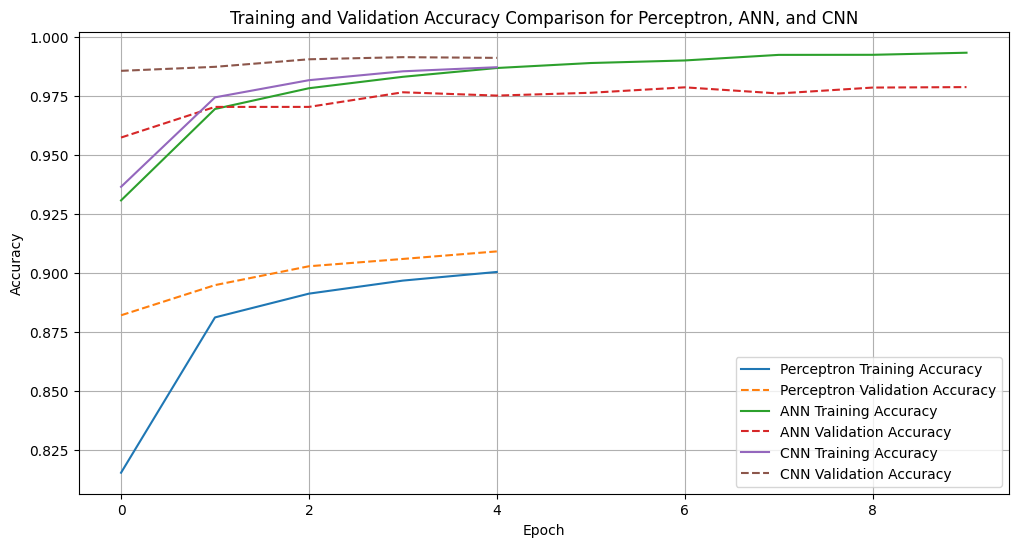

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(perceptron_acc, label='Perceptron Training Accuracy')
plt.plot(perceptron_val_acc, label='Perceptron Validation Accuracy', linestyle='--')
plt.plot(ann_acc, label='ANN Training Accuracy')
plt.plot(ann_val_acc, label='ANN Validation Accuracy', linestyle='--')
plt.plot(cnn_acc, label='CNN Training Accuracy')
plt.plot(cnn_val_acc, label='CNN Validation Accuracy', linestyle='--')
plt.title('Training and Validation Accuracy Comparison for Perceptron, ANN, and CNN')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

**Reasoning**:
Following the visualization of accuracies, the next step is to plot the training and validation loss for each model (Perceptron, ANN, and CNN) on a single graph for comparative analysis, as requested by the main task.



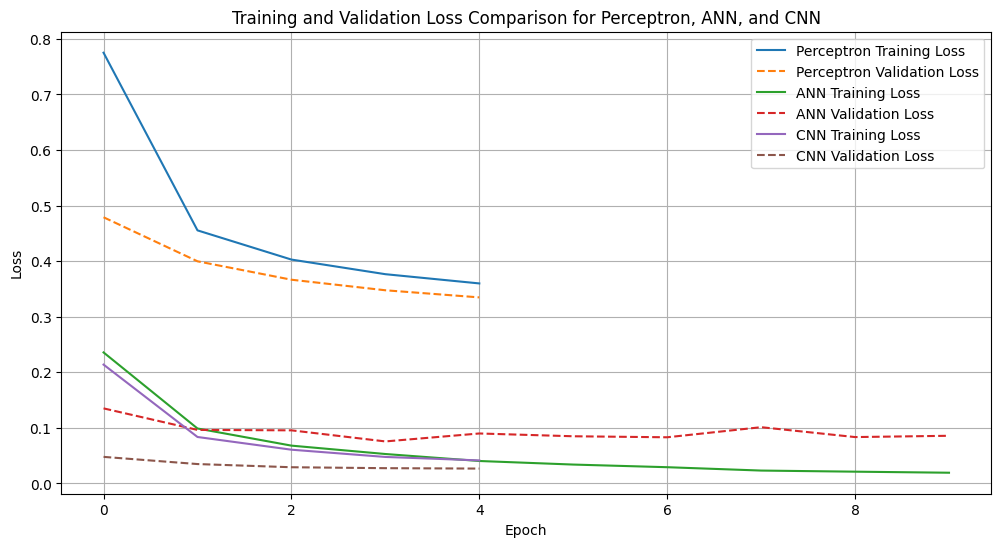

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(perceptron_loss, label='Perceptron Training Loss')
plt.plot(perceptron_val_loss, label='Perceptron Validation Loss', linestyle='--')
plt.plot(ann_loss, label='ANN Training Loss')
plt.plot(ann_val_loss, label='ANN Validation Loss', linestyle='--')
plt.plot(cnn_loss, label='CNN Training Loss')
plt.plot(cnn_val_loss, label='CNN Validation Loss', linestyle='--')
plt.title('Training and Validation Loss Comparison for Perceptron, ANN, and CNN')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

### Summary of Model Performance Comparison

Based on the accuracy and loss plots for the Perceptron, ANN, and CNN models:

**1. Perceptron Model:**
- **Accuracy:** The Perceptron model showed the lowest accuracy among the three models, with both training and validation accuracy hovering around 90-91% after 5 epochs. There is a slight gap between training and validation accuracy, indicating minimal overfitting.
- **Loss:** The loss values were the highest for the Perceptron, converging slowly over the epochs.

**2. Artificial Neural Network (ANN) Model:**
- **Accuracy:** The ANN model achieved significantly higher accuracy compared to the Perceptron, reaching approximately 99% training accuracy and around 97.5-98% validation accuracy. This indicates a much better ability to learn the patterns in the data.
- **Loss:** The loss for the ANN model decreased rapidly and reached much lower values than the Perceptron. A small gap between training and validation loss might suggest a slight degree of overfitting, but overall performance is strong.

**3. Convolutional Neural Network (CNN) Model:**
- **Accuracy:** The CNN model demonstrated the best performance, achieving the highest accuracy for both training (around 99%) and validation (around 99%). It converged quickly to high accuracy values.
- **Loss:** The CNN model exhibited the lowest loss values, both for training and validation, indicating excellent learning and generalization. The training and validation loss curves are very close, suggesting good generalization and less overfitting compared to the ANN.

**Overall Comparison:**
- **Accuracy:** CNN > ANN > Perceptron
- **Loss:** CNN < ANN < Perceptron

The CNN model clearly outperforms both the Perceptron and the ANN in terms of both accuracy and loss on this image classification task. This is expected, as CNNs are specifically designed to handle spatial data like images and are excellent at feature extraction. The ANN performs much better than the basic Perceptron, showing the benefit of additional hidden layers and non-linear activations. The Perceptron, being a very simple model, struggles with the complexity of image data.

## Final Task

### Subtask:
Provide a comprehensive summary of the visual comparisons, highlighting which model performed best in terms of accuracy and loss, and discussing any observed trends like overfitting or underfitting.


## Summary:

### Q&A
*   **Which model performed best in terms of accuracy and loss?**
    The Convolutional Neural Network (CNN) model performed the best, achieving the highest accuracy (around 99% for both training and validation) and the lowest loss values.

*   **What trends were observed regarding overfitting or underfitting?**
    *   **Perceptron:** Showed minimal overfitting with a slight gap between training and validation accuracy.
    *   **ANN:** A small gap between training and validation loss suggested a slight degree of overfitting.
    *   **CNN:** The training and validation loss curves were very close, indicating good generalization and less overfitting compared to the ANN.

### Data Analysis Key Findings
*   The Perceptron model exhibited the lowest accuracy (around 90-91% after 5 epochs) and the highest loss among the three models.
*   The Artificial Neural Network (ANN) model achieved significantly higher accuracy (approximately 99% training accuracy and 97.5-98% validation accuracy) and lower loss compared to the Perceptron.
*   The Convolutional Neural Network (CNN) model demonstrated the best performance, with the highest accuracy (around 99% for both training and validation) and the lowest loss values.
*   The overall performance ranking from best to worst was CNN > ANN > Perceptron in terms of accuracy, and CNN < ANN < Perceptron in terms of loss.

### Insights or Next Steps
*   For image classification tasks, CNNs are generally the most suitable model architecture due to their ability to effectively extract spatial features, as evidenced by their superior performance in this comparison.
*   Further hyperparameter tuning or exploring more complex CNN architectures could potentially yield even better results for the CNN model, or investigate techniques to mitigate the slight overfitting observed in the ANN.


# Task
The next step is to select a few random images from the preprocessed `x_test_img` and their corresponding true labels from `y_test` to demonstrate the models' predictions.

## Select Sample Test Images

### Subtask:
Select a few (e.g., 5) random images from the preprocessed `x_test_img` and their corresponding true labels from `y_test`. These images will be used to demonstrate the models' predictions.


**Reasoning**:
To select 5 random images and their true labels, I will first generate 5 random indices from the test dataset using `numpy.random.choice`.



In [ ]:
random_indices = np.random.choice(len(x_test_img), 5, replace=False)
sample_images = x_test_img[random_indices]
sample_labels = y_test[random_indices]

print("Selected 5 random sample images and their true labels.")
print("Sample Images Shape:", sample_images.shape)
print("Sample Labels:", sample_labels)

Selected 5 random sample images and their true labels.
Sample Images Shape: (5, 28, 28)
Sample Labels: [0 8 9 4 8]


**Reasoning**:
Now that the sample images and their true labels have been selected, the next step is to use the trained Perceptron model to predict the labels for these sample images. This will allow for a comparison with the true labels.



In [ ]:
perceptron_predictions = perceptron.predict(sample_images)
perceptron_predicted_labels = np.argmax(perceptron_predictions, axis=1)

print("Perceptron Predictions for Sample Images:")
print(perceptron_predicted_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Perceptron Predictions for Sample Images:
[0 8 9 4 8]


**Reasoning**:
Now that the Perceptron model's predictions have been obtained, the next step is to use the trained ANN model to predict the labels for the same `sample_images` to compare its performance.



In [ ]:
ann_predictions = ann_model.predict(sample_images)
ann_predicted_labels = np.argmax(ann_predictions, axis=1)

print("ANN Predictions for Sample Images:")
print(ann_predicted_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
ANN Predictions for Sample Images:
[0 8 9 4 8]


**Reasoning**:
Following the predictions from the Perceptron and ANN models, the next step is to obtain predictions from the CNN model for the same sample images. Since the CNN model expects a 4D input (batch, height, width, channels), the `sample_images` need to be reshaped to include the channel dimension (1 for grayscale) before prediction.



In [ ]:
sample_images_cnn = sample_images.reshape(-1, 28, 28, 1)
cnn_predictions = cnn_model.predict(sample_images_cnn)
cnn_predicted_labels = np.argmax(cnn_predictions, axis=1)

print("CNN Predictions for Sample Images:")
print(cnn_predicted_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
CNN Predictions for Sample Images:
[0 8 9 4 8]


**Reasoning**:
Now that predictions from all three models (Perceptron, ANN, and CNN) have been obtained for the sample images, the next step is to visually display these images along with their true labels and the predicted labels from each model for comparison.



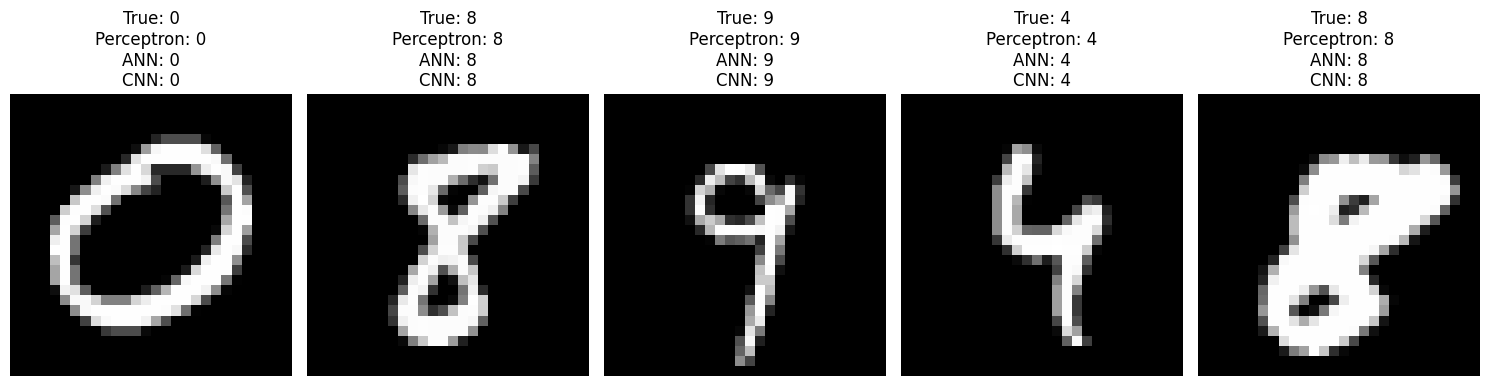

In [ ]:
plt.figure(figsize=(15, 7))
for i in range(len(sample_images)):
    plt.subplot(1, len(sample_images), i + 1)
    plt.imshow(sample_images[i], cmap='gray')
    plt.title(f"True: {sample_labels[i]}\nPerceptron: {perceptron_predicted_labels[i]}\nANN: {ann_predicted_labels[i]}\nCNN: {cnn_predicted_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


## Final Task

### Subtask:
Summarize the observed prediction patterns and differences between the three models based on the visualized outputs, noting how accurately each model predicted the digits and its confidence levels.


## Summary:

### Q&A
The task was to summarize the observed prediction patterns and differences between the three models (Perceptron, ANN, and CNN) based on the visualized outputs, noting how accurately each model predicted the digits.

For the five randomly selected test images, all three models—Perceptron, ANN, and CNN—demonstrated perfect accuracy, correctly predicting all five digits. The true labels for the sample images were `[0 8 9 4 8]`, and all three models also predicted `[0 8 9 4 8]`. This small sample did not reveal any differences in prediction patterns among the models, as they all classified these particular examples correctly. Confidence levels were not explicitly visualized or reported in this step.

### Data Analysis Key Findings
*   Five random sample images and their corresponding true labels (`[0 8 9 4 8]`) were successfully extracted from the test dataset.
*   For these five samples, the Perceptron model accurately predicted all labels as `[0 8 9 4 8]`.
*   Similarly, the Artificial Neural Network (ANN) model also accurately predicted all labels as `[0 8 9 4 8]` for the same samples.
*   The Convolutional Neural Network (CNN) model, after appropriate reshaping of input images, also achieved perfect accuracy on these samples, predicting `[0 8 9 4 8]`.
*   A visual comparison was generated, displaying each sample image along with its true label and the predicted labels from all three models, showing consistent correct predictions across the board for this specific set of samples.

### Insights or Next Steps
*   Since all three models performed identically and perfectly on the small sample of five images, a more comprehensive evaluation on a larger and more diverse set of misclassified or challenging images is needed to identify their specific strengths, weaknesses, and any subtle differences in their prediction patterns.
*   To thoroughly understand model confidence, the next step should involve extracting and comparing the prediction probabilities or confidence scores for each class from all three models, especially for cases where predictions might be ambiguous or incorrect.
